In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('data/NBA Season Data.csv')
data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
count,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17663.000000,17011.000000,17651.000000,17729.000000,17729.00000,...,17729.000000,17263.000000,17727.000000,17261.00000,17261.000000,17261.000000,17261.000000,17261.000000,17727.000000,17261.000000
mean,1999.166958,26.087145,47.639686,1132.965706,12.138818,0.489599,0.146633,0.314121,6.086914,13.33439,...,0.241593,2.210624,2.805805,3.02523,27.361191,4.373964,78.831933,214.022652,2.803520,27.444296
std,11.119839,5.816735,28.289753,949.747290,6.701130,0.126480,0.183274,0.236330,5.082961,6.94874,...,1.834127,3.869624,1.410654,1.41301,4.514413,3.831708,4.281610,27.746527,1.450073,4.524939
min,1978.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-9.200000,-1.700000,0.000000,1.00000,18.270000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1990.000000,23.000000,21.000000,239.000000,9.400000,0.467000,0.003000,0.193000,2.400000,8.50000,...,-0.500000,0.000000,1.500000,2.00000,24.180000,1.000000,76.000000,192.000000,1.000000,24.000000
50%,2000.000000,26.000000,52.000000,935.000000,12.600000,0.514000,0.048000,0.286000,5.300000,12.50000,...,0.000000,0.100000,2.800000,3.00000,26.660000,3.000000,79.000000,215.000000,3.000000,27.000000
75%,2009.000000,29.000000,75.000000,1894.000000,15.700000,0.550000,0.265000,0.394000,9.000000,17.90000,...,0.700000,3.100000,4.000000,4.00000,29.970000,7.000000,82.000000,233.000000,4.000000,30.000000
max,2016.000000,44.000000,82.000000,3638.000000,129.100000,1.250000,1.000000,6.000000,100.000000,100.00000,...,15.100000,35.200000,5.000000,5.00000,115.090000,20.000000,91.000000,360.000000,5.000000,115.000000


In [81]:
datayear = data.groupby('Year')
dataage = data[data['G'] > 29].groupby('Age')

In [79]:
datayear.aggregate(np.mean)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
Year,,,,,,,,,,,,,,,,,,,,,
1978,25.906061,53.748485,1321.696970,12.684545,0.486535,NaN,0.317860,6.479697,13.283939,9.889394,...,0.268788,2.244848,2.550000,2.945455,26.378879,3.593939,78.075758,202.975758,2.542424,26.460606
1979,25.853035,56.830671,1389.648562,12.710863,0.504736,NaN,0.311521,6.584345,12.856550,9.713738,...,0.280831,2.266454,2.558147,2.974441,26.313546,3.546326,78.169329,202.846645,2.536741,26.367412
1980,26.164087,54.789474,1350.650155,12.913932,0.504384,0.028189,0.310621,6.790093,12.929102,9.863467,...,0.274613,2.429102,2.594118,2.993808,26.633375,3.804954,78.325077,203.739938,2.585139,26.687307
1981,25.871257,55.727545,1363.293413,12.623952,0.500796,0.024874,0.325805,6.814072,13.057784,9.926347,...,0.275449,2.340719,2.614072,2.958084,26.337036,3.386228,78.371257,203.455090,2.610778,26.416168
1982,26.005797,55.898551,1320.840580,12.790725,0.514200,0.027838,0.339878,6.540290,12.706957,9.609275,...,0.268406,2.212754,2.661449,3.037681,26.489565,3.481159,78.573913,204.472464,2.649275,26.562319
1983,26.129577,54.363380,1281.943662,12.664789,0.503961,0.026428,0.325611,6.829577,13.171831,9.994366,...,0.265634,2.284789,2.744789,3.123944,26.634085,3.653521,78.797183,205.723944,2.715493,26.715493
1984,26.137195,59.554878,1391.737805,12.733232,0.520147,0.029774,0.363804,6.700915,12.824085,9.764024,...,0.284756,2.259756,2.713415,3.024390,26.627927,3.649390,78.746951,206.033537,2.692073,26.692073
1985,26.198830,56.400585,1331.403509,12.075439,0.507904,0.034588,0.348383,6.736842,12.628655,9.684211,...,0.275439,2.266374,2.724854,3.058480,26.706374,3.622807,78.809942,206.719298,2.716374,26.774854
1986,26.406780,54.827684,1287.118644,12.207627,0.508359,0.039773,0.352878,6.722034,12.943503,9.850565,...,0.265254,2.279379,2.780226,3.056497,26.889407,3.748588,79.019774,207.488701,2.768362,26.974576


In [82]:
dataage.aggregate(np.mean)

,Year,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
Age,,,,,,,,,,,,,,,,,,,,,
18,2001.166667,48.333333,603.500000,12.300000,0.470833,0.076667,0.398833,9.600000,17.716667,13.633333,...,0.133333,0.400000,4.150000,4.000000,18.530000,0.000000,82.000000,235.166667,4.166667,18.666667
19,2006.307692,62.569231,1367.600000,12.772308,0.499754,0.146323,0.332154,6.887692,14.630769,10.735385,...,0.060000,1.255385,3.253846,3.076923,19.612154,0.123077,80.000000,220.969231,3.276923,19.738462
20,2005.857923,63.928962,1477.978142,13.611475,0.511628,0.141231,0.337328,7.014208,15.219126,11.087978,...,0.417486,2.048087,3.229508,3.081967,20.999781,0.415301,79.234973,219.994536,3.218579,21.098361
21,2003.408964,65.448179,1599.252101,13.988515,0.514053,0.155977,0.313661,6.643417,14.424370,10.506162,...,0.216246,2.442017,3.086275,2.971989,21.839076,0.677871,79.148459,219.221289,3.084034,21.921569
22,1997.076923,63.394649,1395.947603,13.242698,0.512974,0.125380,0.326664,6.649498,13.501003,10.062876,...,0.109365,1.897882,2.864994,2.919732,22.673891,0.620959,78.703456,214.215162,2.867336,22.780379
23,1996.101473,63.918167,1452.280687,13.390507,0.515211,0.120009,0.329511,6.621686,13.482979,10.039034,...,0.255646,2.348527,2.853846,2.954173,23.656669,1.055646,78.643208,213.475450,2.850245,23.746318
24,1996.609277,64.146226,1536.495283,13.842767,0.521189,0.129495,0.328472,6.495362,13.599764,10.037107,...,0.287264,2.769733,2.861950,2.982704,24.569953,1.834906,78.786950,213.662736,2.855346,24.644654
25,1996.654331,65.407906,1630.088310,14.315391,0.525954,0.133009,0.325008,6.373675,13.778890,10.066863,...,0.349033,3.145416,2.846678,2.988225,25.506552,2.697225,78.797309,213.284272,2.846930,25.586207
26,1996.833483,65.117912,1679.577858,14.391269,0.527930,0.141859,0.324046,6.274797,13.824302,10.043834,...,0.401800,3.359586,2.856796,3.016202,26.658362,3.632763,78.722772,212.862286,2.857786,26.737174


In [91]:
data19 = data[(data['Age'] == 19) & (data['G'] > 29)]
data20 = data[(data['Age'] == 20) & (data['G'] > 29)]
data21 = data[(data['Age'] == 21) & (data['G'] > 29)]
data22 = data[(data['Age'] == 22) & (data['G'] > 29)]
data23 = data[(data['Age'] == 23) & (data['G'] > 29)]
data24 = data[(data['Age'] == 24) & (data['G'] > 29)]
data25 = data[(data['Age'] == 25) & (data['G'] > 29)]
data26 = data[(data['Age'] == 26) & (data['G'] > 29)]
data27 = data[(data['Age'] == 27) & (data['G'] > 29)]
data28 = data[(data['Age'] == 28) & (data['G'] > 29)]
data29 = data[(data['Age'] == 29) & (data['G'] > 29)]
data30 = data[(data['Age'] == 30) & (data['G'] > 29)]
data31 = data[(data['Age'] == 31) & (data['G'] > 29)]
data32 = data[(data['Age'] == 32) & (data['G'] > 29)]
data33 = data[(data['Age'] == 33) & (data['G'] > 29)]
data34 = data[(data['Age'] == 34) & (data['G'] > 29)]
data35 = data[(data['Age'] == 35) & (data['G'] > 29)]
data36 = data[(data['Age'] == 36) & (data['G'] > 29)]
data37 = data[(data['Age'] == 37) & (data['G'] > 29)]
data38 = data[(data['Age'] == 38) & (data['G'] > 29)]

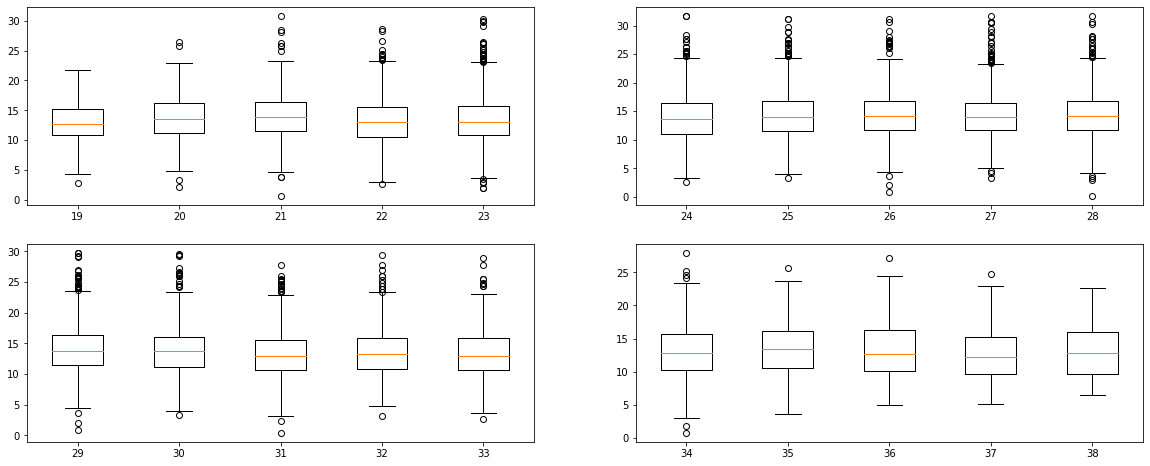

In [110]:
fig,ax = plt.subplots(2,2, figsize = (20,8))
ax[0,0].boxplot([data19['PER'],data20['PER'],data21['PER'],data22['PER'],data23['PER']]);
ax[0,0].set_xticklabels(range(19,24));
ax[0,1].boxplot([data24['PER'],data25['PER'],data26['PER'],data27['PER'],data28['PER']]);
ax[0,1].set_xticklabels(range(24,29));
ax[1,0].boxplot([data29['PER'],data30['PER'],data31['PER'],data32['PER'],data33['PER']]);
ax[1,0].set_xticklabels(range(29,34));
ax[1,1].boxplot([data34['PER'],data35['PER'],data36['PER'],data37['PER'],data38['PER']]);
ax[1,1].set_xticklabels(range(34,39));

In [126]:
data26['PER']

0        15.7
4        22.0
16       14.1
26       14.8
27       16.9
         ... 
16550    18.1
16553    19.9
16593    13.0
16658     7.1
16752     9.0
Name: PER, Length: 1111, dtype: float64